In [1]:
import rasterio as rs
import geopandas as gpd

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


from pathlib import Path, PosixPath
from tqdm import tqdm
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [4]:
data_path = '../features/'

In [7]:
patches_imgs = [fn for fn in os.listdir(f'{data_path}') if fn.endswith('.tif')]
patches_imgs.sort()

In [8]:
patches_imgs

['p0_stack_ee.tif', 'p1_stack_ee.tif', 'p2_stack_ee.tif', 'p3_stack_ee.tif']

# RGB images

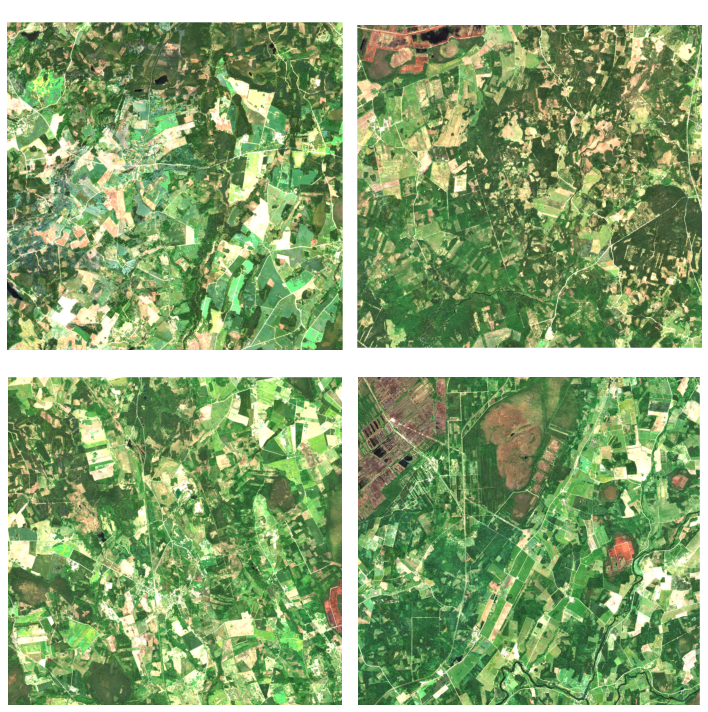

In [10]:
# some stuff for pretty plots
ncols = 2
nrows = 2
subplot_kw = {'xticks': [], 'yticks': [], 'frame_on': False}

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols, 5 * nrows),
                        subplot_kw=subplot_kw)

for idx, image in enumerate(patches_imgs):
    img = rs.open(f'../features/{image}').read([4,3,2])
    ax = axs[idx // ncols][idx % ncols]
    ax.imshow(np.clip(np.moveaxis(img,0,-1) * 5/5000, 0, 1))
    ax.set_title(f'{patches_imgs[idx]}_RGB', fontsize=13,color='white',fontweight='bold')

plt.tight_layout()

# Validation date

In [25]:
colors = ['red', 'green', 'orange', 'blue', 'yellow', 'purple','c','pink','y']
bounds = [201,302,303,304,305,306,307,501]

cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


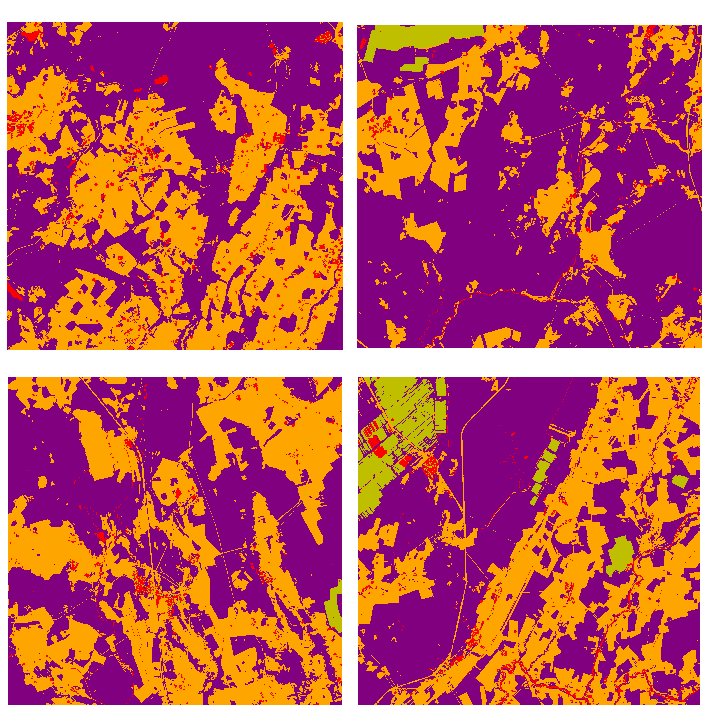

In [26]:
# some stuff for pretty plots
ncols = 2
nrows = 2
subplot_kw = {'xticks': [], 'yticks': [], 'frame_on': False}

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols, 5 * nrows),
                        subplot_kw=subplot_kw)

for idx, image in enumerate(patches_imgs):
    img = rs.open(f'../features/{image}').read(1)
    ax = axs[idx // ncols][idx % ncols]
    ax.imshow(img,interpolation='none', cmap=cmap, norm=norm)
    ax.set_title(f'{patches_imgs[idx]}_LULC', fontsize=13,color='white',fontweight='bold')

plt.tight_layout()

In [23]:
df = pd.read_parquet('../data/features.parquet')

In [24]:
df.head()

,blue,green,red,red_e1,red_e2,red_e3,nir1,nir2,swir1,swir2,lulc,NDVI,NDWI
0,361,614,372,992,2002,2185,2184,1873,1625,957,3,0.70892,0.390640
1,391,700,389,969,1983,2288,2618,1891,1682,1012,3,0.74127,0.442424
2,391,700,389,969,1983,2288,2618,1891,1682,1012,3,0.74127,0.442424
3,291,423,308,760,1613,1626,1520,1354,1200,747,3,0.66302,0.340979
4,291,423,308,760,1613,1626,1520,1354,1200,747,1,0.66302,0.340979


# Histgram of different bands - Patch 01

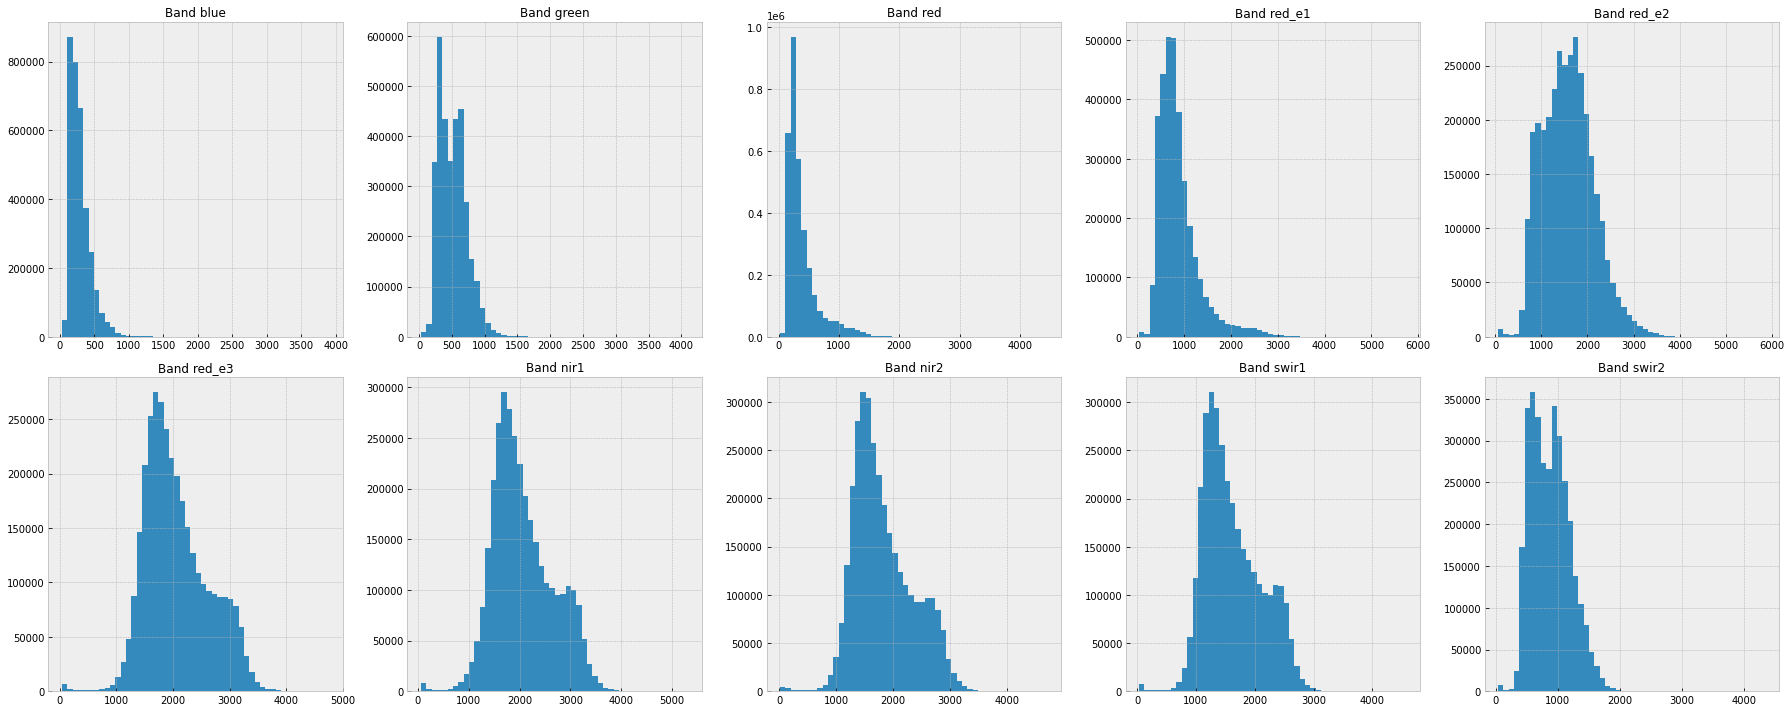

In [33]:
col_names = [i for i in df.columns if i!='lulc']
ncols = 5
nrows = 2

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols, 5 * nrows),tight_layout=True)

for idx,col in enumerate(col_names[:-2]):
    ax = axs[idx // ncols][idx % ncols]
    ax.hist(df[col], bins=50)
    ax.set_title(f'Band {col}', fontsize=12)

# Features Exploration - Patch 01

In [34]:
def correlation_heatmap_ensemble(df):
    _ , ax = plt.subplots(figsize =(15, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

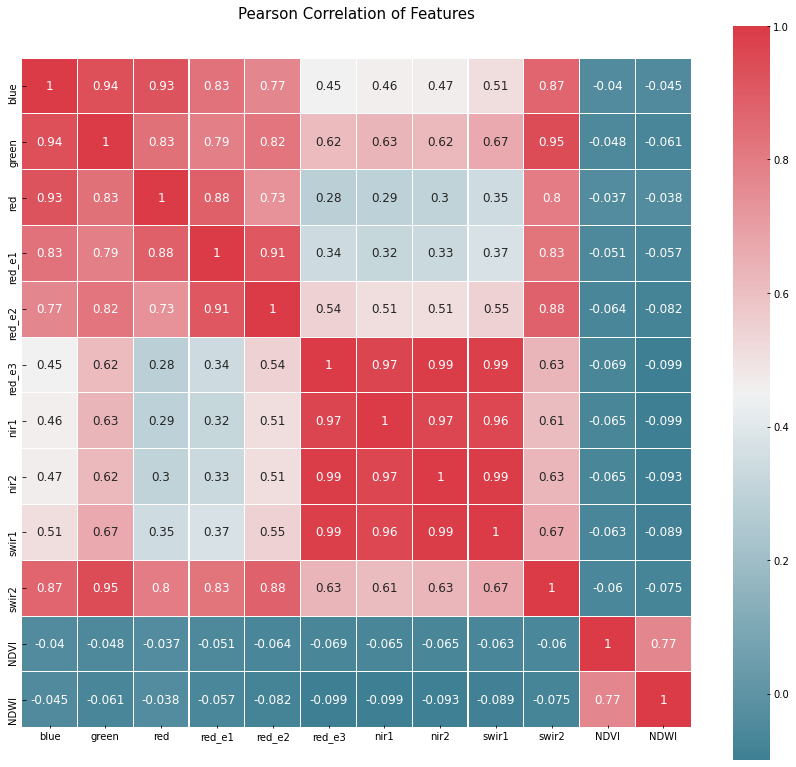

In [35]:
correlation_heatmap_ensemble(df[col_names])

In [25]:
labels=['forest','arable_land','grassland','swamp','peat field','residential_area','water', 'roads']
codes=[1,2,3,4,5,6,7,8]
labels_dict = {k:i for i,k in zip(labels,codes)}
df.lulc = df.lulc.map(labels_dict)

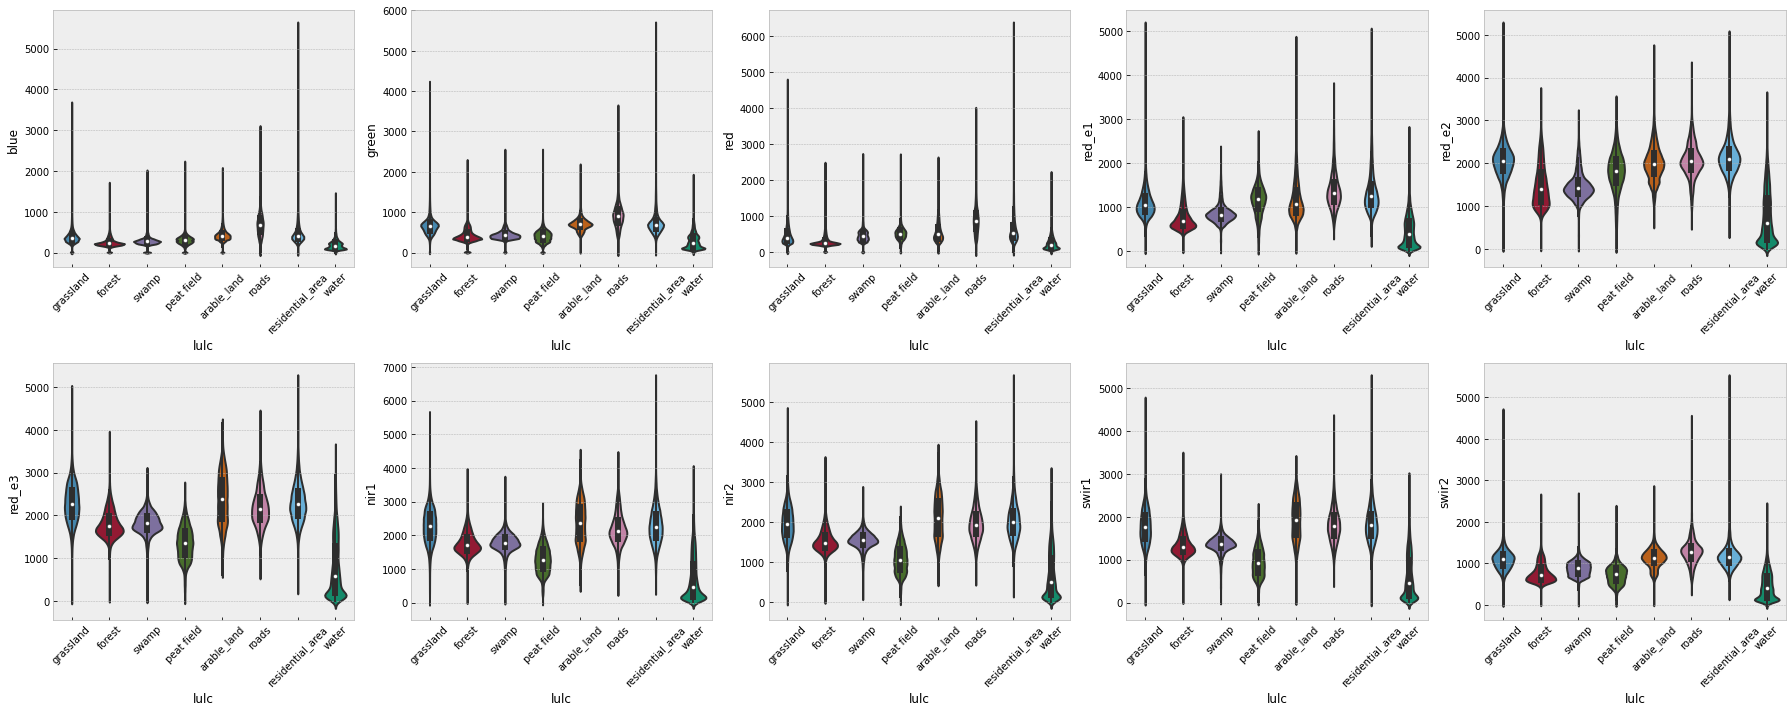

In [28]:
col_names = [i for i in df.columns if i!='lulc']
ncols = 5
nrows = 2

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols, 5 * nrows),tight_layout=True)

for idx,col in enumerate(col_names[:-2]):
    ax = axs[idx // ncols][idx % ncols]
    sns.violinplot(ax=ax, x="lulc", y=col, data=df)
    ax.tick_params(axis='x', rotation=45)
